In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df=df.drop(['ID#'],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data=pd.DataFrame(trans.fit_transform(df.iloc[:,1:]))
data

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


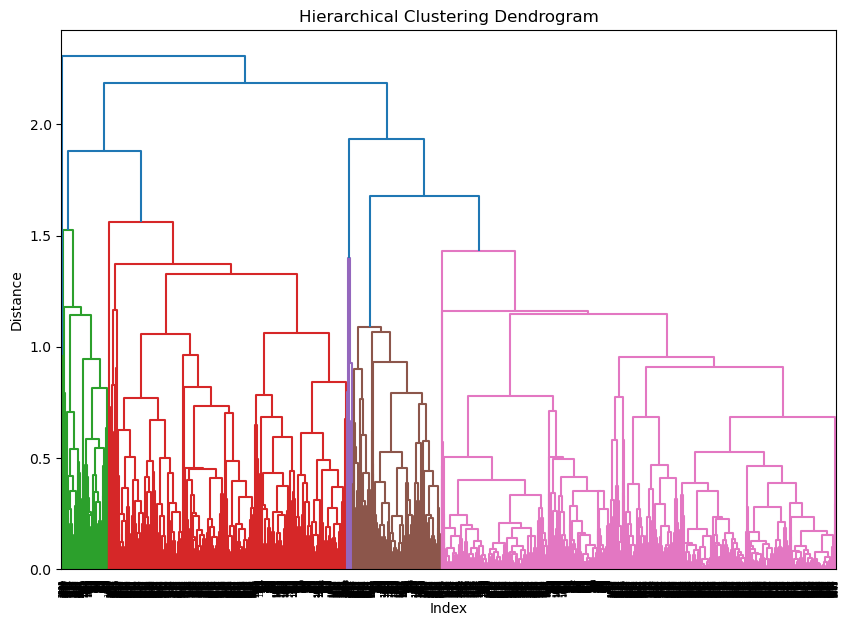

In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(data, method="complete",metric="euclidean")
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

In [15]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df['clust']=cluster_labels # creating a  new column and assigning it to new column 
df


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [16]:
data = df[(df.clust==1)]
data 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [17]:
data = df[(df.clust==0)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0


In [18]:
data = df[(df.clust==2)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
198,8669,0,1,3,1,11397,16,0,0,7486,1,2
940,44824,0,1,3,1,21107,19,2000,4,5916,1,2
2047,4148,0,1,3,1,13504,18,0,0,4607,1,2
2166,100634,0,1,3,1,69669,28,1540,12,4193,1,2
2978,22805,0,1,3,1,26334,27,1800,6,3294,1,2
2999,142527,1000,1,3,1,24091,47,4650,24,3206,1,2


In [19]:
data = df[(df.clust==3)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3


In [20]:
data = df[(df.clust==4)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
384,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,15835,0,2,1,5,112171,16,0,0,5825,1,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,4
1946,126873,0,4,1,5,95598,32,500,1,3880,1,4
2364,108081,0,5,1,5,217006,24,0,0,3567,1,4


# K Means

In [28]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [46]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [47]:
df_norm = norm_func(df.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


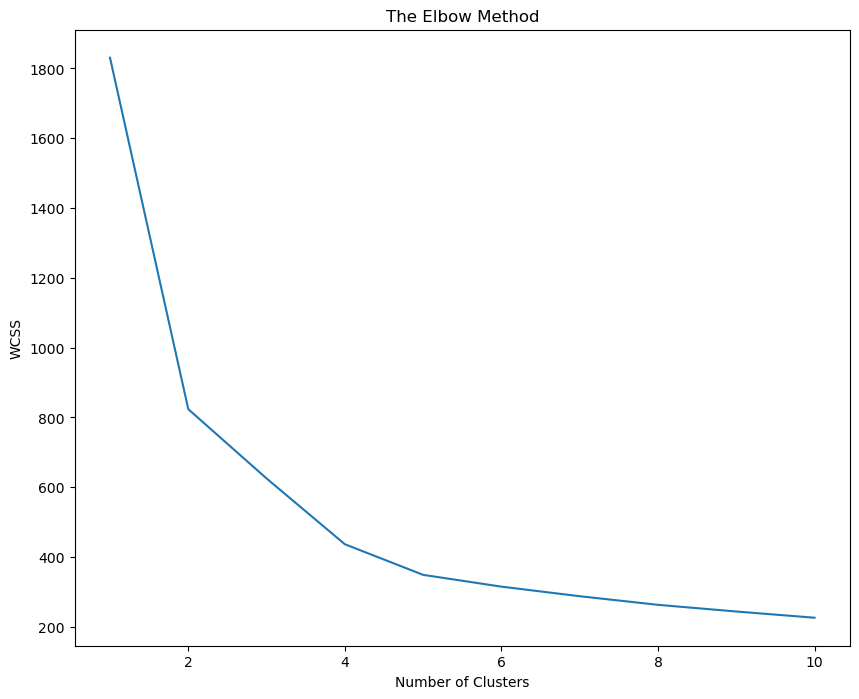

In [48]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [49]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [50]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([0, 0, 0, ..., 2, 4, 4])

In [51]:
y_kmeans 

array([0, 0, 0, ..., 2, 4, 4])

In [52]:
clf.cluster_centers_ 

array([[ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  1.11022302e-15],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -4.44089210e-16],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
  

In [53]:
clf.inertia_

348.9433217254136

In [54]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
df['clust']=md # creating a  new column and assigning it to new column 
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [56]:
df.iloc[:,1:13].groupby(df.clust).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1.0
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,2.0
3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,3.0
4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

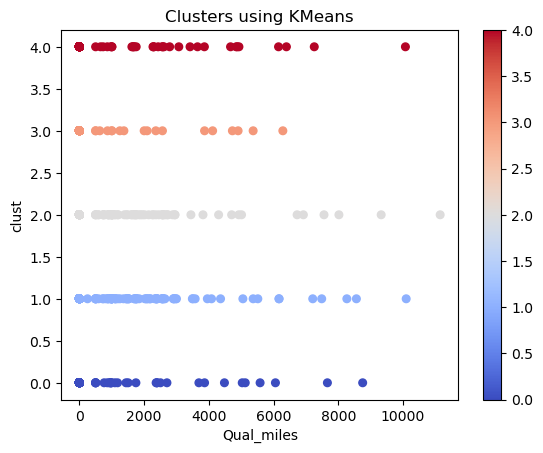

In [59]:
df.plot(x="Qual_miles",y ="clust",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')   

In [60]:
WCSS

[1830.7932128584112,
 823.6756984125205,
 625.1684881570719,
 436.7088576193262,
 348.94342839013166,
 315.1515406007404,
 287.73052915324706,
 263.04891963882994,
 243.91664703659063,
 226.1119504382171]

# DBSCAN

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  clust              3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [69]:
df1 = df.drop(['ID#'],axis=1)  

In [70]:
array=df1.values
array 

array([[28143,     0,     1, ...,  7000,     0,     0],
       [19244,     0,     1, ...,  6968,     0,     0],
       [41354,     0,     1, ...,  7034,     0,     0],
       ...,
       [73597,     0,     3, ...,  1402,     1,     2],
       [54899,     0,     1, ...,  1401,     0,     4],
       [ 3016,     0,     1, ...,  1398,     0,     4]], dtype=int64)

In [71]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -1.38855365e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -1.38855365e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -1.38855365e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.58318399e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.29688997e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.29688997e+00]])

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
X = stscaler.transform(array) 

scores = []
eps_values = np.linspace(0.1, 1, 10)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

optimal_eps = eps_values[np.argmax(scores)]

In [78]:
optimal_eps

0.9

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

X = stscaler.transform(array) 

scores = []
min_samples_values = range(2, 20)
for min_samples in min_samples_values:
    dbscan = DBSCAN(min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

optimal_min_samples = min_samples_values[np.argmax(scores)]

In [81]:
optimal_min_samples

5

In [86]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)  

DBSCAN(eps=0.9)

In [87]:
dbscan.labels_

array([0, 0, 0, ..., 3, 4, 4], dtype=int64)

In [88]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [89]:
df1 = pd.concat([df,cl],axis=1)  
df1  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4,4
